In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
dataset = pd.read_excel("Tank wise GL from 2018 to 2020.xlsx",sheet_name="Sheet1",usecols="B,E:G,J,K,M,N:P",header=0)

In [49]:
dataset.dropna(axis=0,inplace=True)

In [50]:
dataset.columns

Index(['Tank Cap', 'OP L15', 'RE L15', 'DE L15', 'LG L15', 'LG% L15',
       'Loss/(Gain) % L15', 'Product_Grade', 'Hot Months', 'Gain/Loss'],
      dtype='object')

In [51]:
zz = dataset[dataset["Product_Grade"]=="HSD"]

In [52]:
X = zz.drop(columns=["Product_Grade","Gain/Loss","LG% L15","Loss/(Gain) % L15","LG L15"],axis=1)
y = zz["LG L15"]

In [53]:
np.corrcoef(zz["LG L15"],zz["Tank Cap"])

array([[1.        , 0.64338861],
       [0.64338861, 1.        ]])

In [54]:
np.corrcoef(zz["LG L15"],zz["OP L15"])

array([[1.        , 0.18777306],
       [0.18777306, 1.        ]])

In [55]:
np.corrcoef(zz["LG L15"],zz["RE L15"])

array([[1.        , 0.70412503],
       [0.70412503, 1.        ]])

In [56]:
np.corrcoef(zz["LG L15"],zz["DE L15"])

array([[1.        , 0.82388222],
       [0.82388222, 1.        ]])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
predictions = lm.predict(X_test)

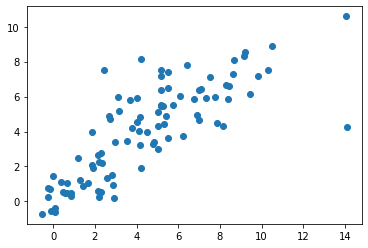

In [60]:
plt.scatter(y_test,predictions)

In [61]:
np.corrcoef(y_test,predictions)

array([[1.        , 0.80357619],
       [0.80357619, 1.        ]])

In [62]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

-1.1401912294640004


,Coefficient
Tank Cap,0.000217
OP L15,0.000340
RE L15,0.000181
DE L15,0.000924
Hot Months,0.080336


In [63]:
from sklearn import metrics

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3696794846221103
MSE: 3.735203896336566
RMSE: 1.932667559705126


In [65]:
import statsmodels.api as sm

In [66]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 LG L15   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     53.33
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.74e-29
Time:                        20:06:03   Log-Likelihood:                -263.72
No. Observations:                 132   AIC:                             539.4
Df Residuals:                     126   BIC:                             556.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1658      0.551     -0.301      0.7

### TRECS DATA MODELLING

In [67]:
datafr = pd.read_excel("TRECS India Plant Reports JAN 2018 TO AUG 2020.xlsx",sheet_name="AnalyzeData",header=0,usecols="B:R")

In [68]:
MS_filter = datafr["Product_Grade"].isin(["MS"])
HSD_filter = datafr["Product_Grade"].isin(["HSD"])

plant_filter = datafr["PlantID"].isin([12]) # indicating the plant to be chosen

In [69]:
datafr[HSD_filter & plant_filter].columns

Index(['PlantID', 'TankCode', 'TerminalProductCode', 'TerminalProductDesc',
       'OpeningStock', 'OpeningStockTemp', 'OpeningStockDensity', 'Receipt',
       'Disposal', 'ClosingStock', 'ClosingStockTemp', 'ClosingStockDensity',
       'BookStock', 'Gain', 'MonthNo', 'YearNo', 'Product_Grade'],
      dtype='object')

In [70]:
abc = datafr[HSD_filter & plant_filter].copy()

# dataframe for running the regression analysis
cde = abc[~abc['Gain'].isin([0])].copy()

# dataframe for plotting the dormancy behaviour
zero_rec = abc["Receipt"].isin([0])
zero_disp = abc["Disposal"].isin([0])
dorm = abc[zero_rec & zero_disp].copy()

In [71]:
xx=cde.drop(columns=['TankCode','TerminalProductCode', 'TerminalProductDesc','Product_Grade','ClosingStock','BookStock','Gain','OpeningStockTemp','PlantID','MonthNo','YearNo'],axis=1)
yy = cde['Gain']

In [72]:
xx = sm.add_constant(xx)
model = sm.OLS(yy,xx)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gain   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     71.82
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.93e-76
Time:                        20:06:20   Log-Likelihood:                -8385.1
No. Observations:                1193   AIC:                         1.678e+04
Df Residuals:                    1186   BIC:                         1.682e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 126.3798    

In [73]:
aa=cde.drop(columns=['TankCode','TerminalProductCode', 'TerminalProductDesc','Product_Grade','ClosingStock','BookStock','Gain','OpeningStockTemp','PlantID','MonthNo','YearNo'],axis=1)
bb = cde['Gain']

In [74]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(aa, bb, test_size=0.7, random_state=101)
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(XX_train,yy_train)

LinearRegression()

In [75]:
_predictions = lm1.predict(XX_test)

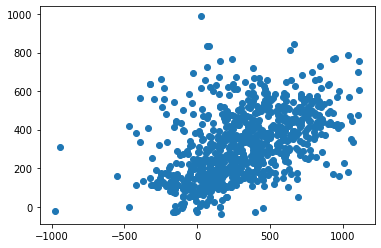

In [76]:
plt.scatter(yy_test,_predictions)

In [77]:
np.corrcoef(yy_test,_predictions)

array([[1.        , 0.48490061],
       [0.48490061, 1.        ]])

In [78]:
print(lm1.intercept_)
coeff_df1 = pd.DataFrame(lm1.coef_,aa.columns,columns=['Coefficient'])
coeff_df1

1163.0950313723322


,Coefficient
OpeningStock,0.000020
OpeningStockDensity,-1.026101
Receipt,-0.000047
Disposal,0.000553
ClosingStockTemp,4.967012
ClosingStockDensity,-0.447883


array([[1.        , 0.22104992],
       [0.22104992, 1.        ]])

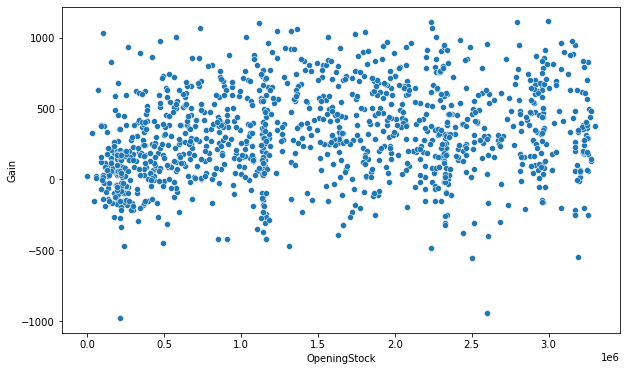

In [79]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='OpeningStock',y='Gain',data = cde)

np.corrcoef(aa['OpeningStock'],bb)

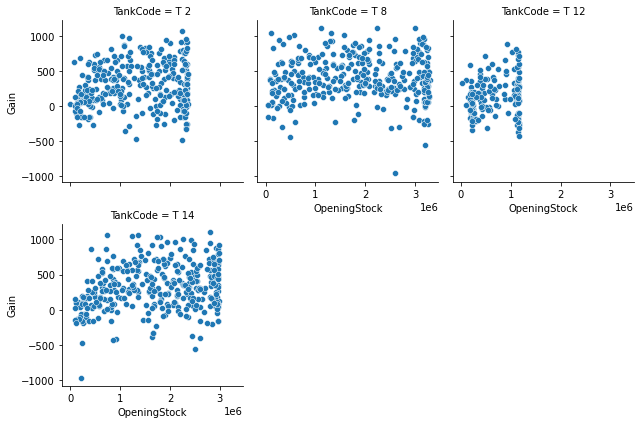

In [80]:
g = sns.FacetGrid(data=cde,col='TankCode',col_wrap=3)
g.map(sns.scatterplot, 'OpeningStock', 'Gain')

array([[1.        , 0.51058559],
       [0.51058559, 1.        ]])

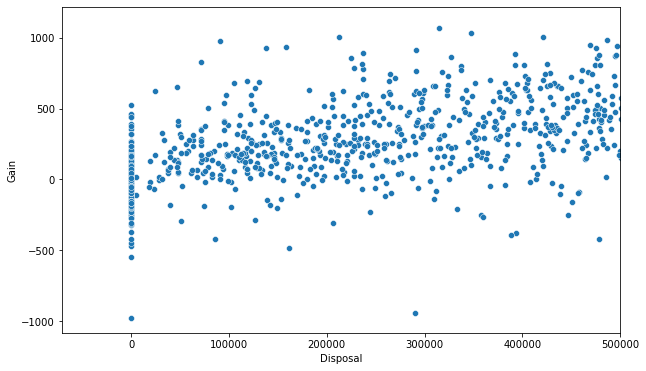

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x='Disposal',y='Gain',data = cde)
ax.set_xlim(None,0.5e6)

np.corrcoef(aa['Disposal'],bb)

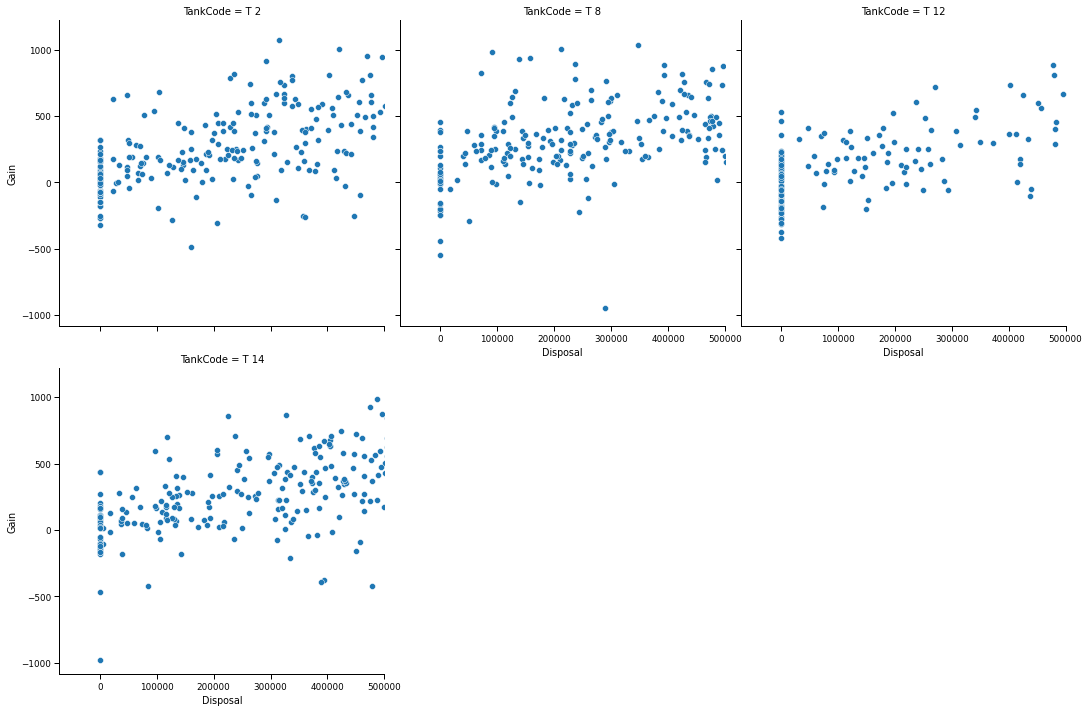

In [82]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=cde,col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map(sns.scatterplot, 'Disposal', 'Gain')
g.set(xlim=(None, 0.5e6))

array([[1.        , 0.00363811],
       [0.00363811, 1.        ]])

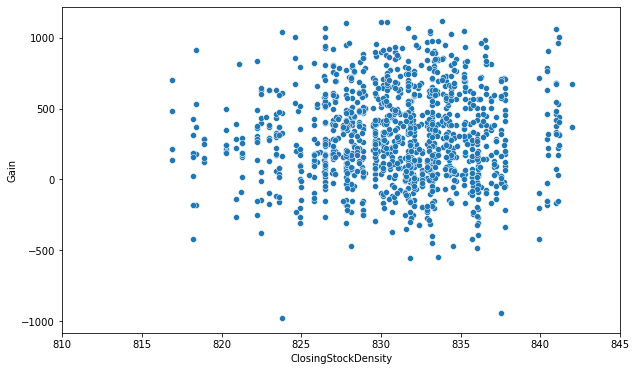

In [83]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x='ClosingStockDensity',y='Gain',data = cde)
ax.set_xlim(810,845)

np.corrcoef(aa['ClosingStockDensity'],bb)

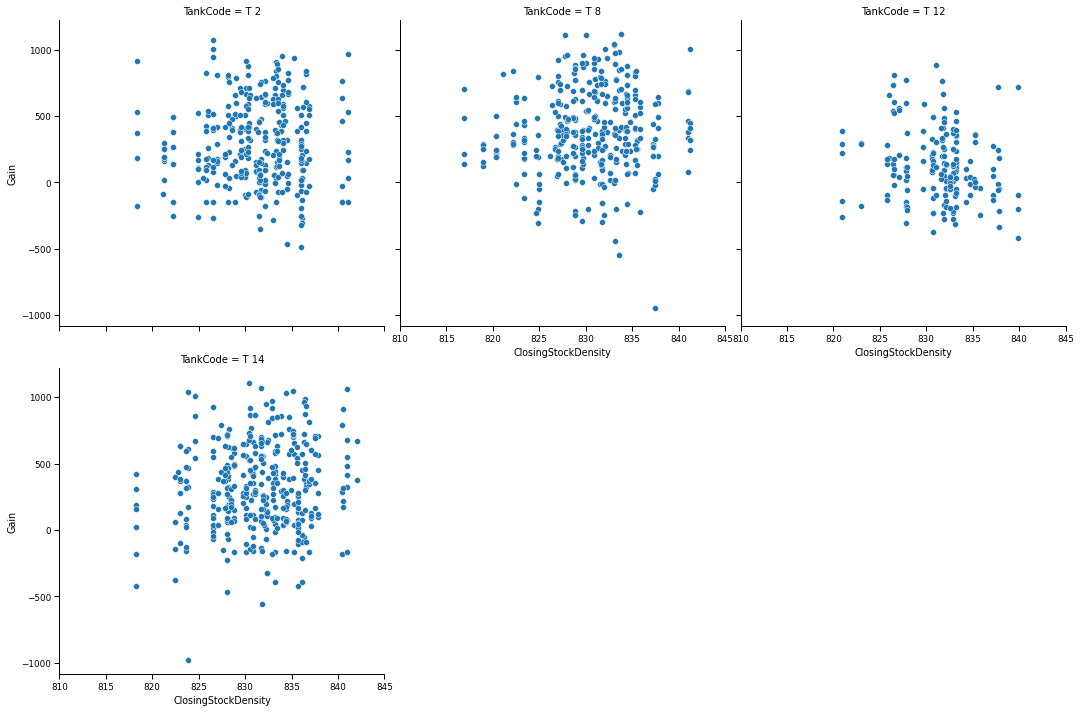

In [84]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=cde,col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map(sns.scatterplot, 'ClosingStockDensity', 'Gain')
g.set(xlim=(810,845))

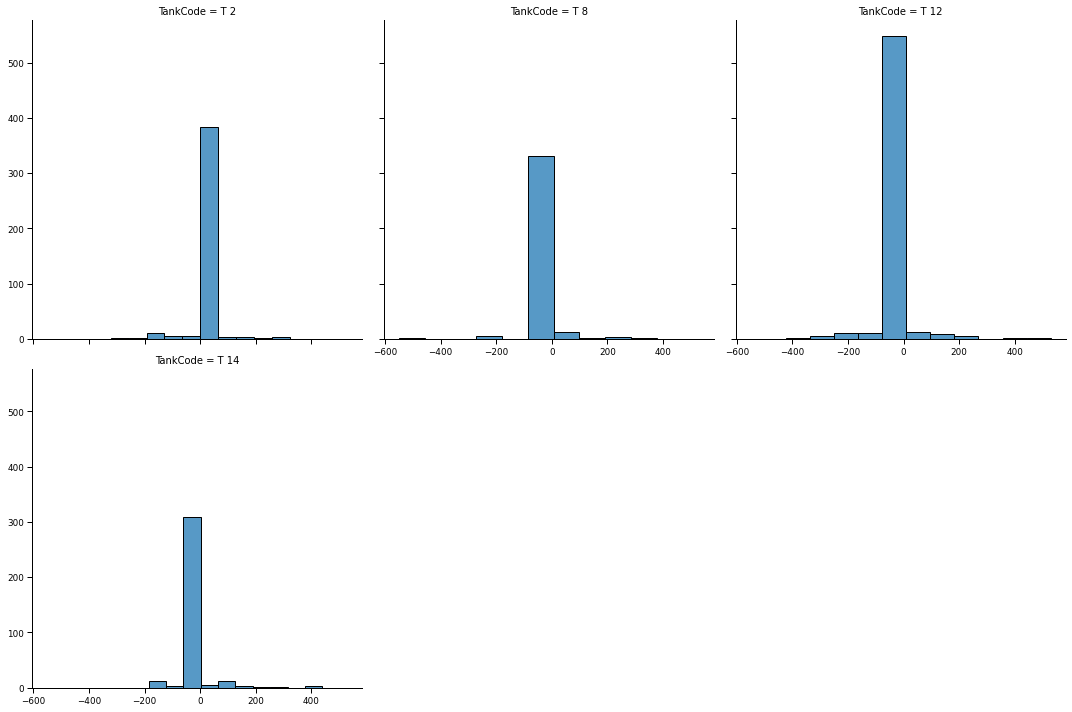

In [85]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=dorm,col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map_dataframe(sns.histplot, x='Gain')

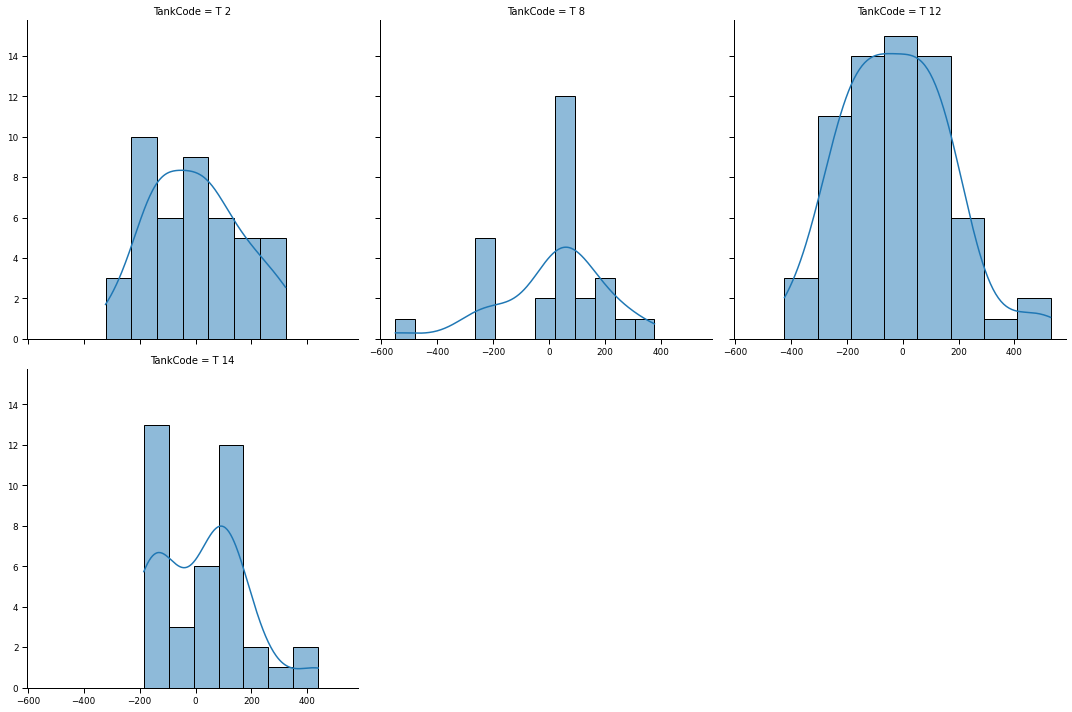

In [86]:
with sns.plotting_context('paper', font_scale = 1):
    g = sns.FacetGrid(data=dorm[dorm['Gain']!=0],col='TankCode',col_wrap=3,height=5,margin_titles=True)
g.map_dataframe(sns.histplot, x='Gain',kde=True)

In [87]:
dorm[dorm['Gain']!=0]

,PlantID,TankCode,TerminalProductCode,TerminalProductDesc,OpeningStock,OpeningStockTemp,OpeningStockDensity,Receipt,Disposal,ClosingStock,ClosingStockTemp,ClosingStockDensity,BookStock,Gain,MonthNo,YearNo,Product_Grade
46,12,T 2,400004353,BF HSD BSIV,232182,32.0,828.9,0,0.0,232030,32.00,828.9,232182.0,-152.0,1,2018,HSD
61,12,T 2,400004353,BF HSD BSIV,2262484,32.0,828.2,0,0.0,2262332,32.00,828.2,2262484.0,-152.0,1,2018,HSD
69,12,T 2,400004353,BF HSD BSIV,2239866,35.5,826.5,0,0.0,2239946,35.25,826.5,2239866.0,80.0,1,2018,HSD
109,12,T 8,400004353,BF HSD BSIV,131862,32.0,828.9,0,0.0,131889,31.75,828.9,131862.0,27.0,1,2018,HSD
117,12,T 12,400004353,BF HSD BSIV,200557,32.0,832.0,0,0.0,200462,32.00,832.0,200557.0,-95.0,1,2018,HSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7310,12,T 8,400004353,BF HSD BSIV,489971,32.0,837.2,0,0.0,489922,31.75,837.2,489971.0,-49.0,9,2018,HSD
7341,12,T 12,400004353,BF HSD BSIV,1164650,32.5,839.9,0,0.0,1164227,32.75,839.9,1164650.0,-423.0,9,2018,HSD
7388,12,T 14,400004353,BF HSD BSIV,453622,32.0,836.9,0,0.0,453459,32.00,836.9,453622.0,-163.0,9,2018,HSD
7507,12,T 2,400004353,BF HSD BSIV,195027,33.5,836.6,0,0.0,194956,33.00,836.6,195027.0,-71.0,10,2018,HSD
